In [1]:
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Activation

In [3]:
(xTrain,yTrain),(xTest,yTest)=mnist.load_data()

In [4]:
xTrain.shape #60000만개 파일, 각 사이즈 28*28 단위 픽셀

(60000, 28, 28)

In [5]:
xTrain=xTrain.reshape(60000,784).astype('float32')/255.0
xTest=xTest.reshape(10000,784).astype('float32')/255.0

In [6]:
yTrain.shape

(60000,)

In [7]:
yTrain
yTrain=np_utils.to_categorical(yTrain)#원 핫 인코딩 해줌
yTest=np_utils.to_categorical(yTest)

In [8]:
#2. 모델 구성
model=Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [9]:
#3. 모델 학습과정 설정
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [10]:
#4. 모델 학습
hist=model.fit(xTrain,yTrain,epochs=5,batch_size=32)
#batch_size = 몇개의 샘플로 가중치를 갱신할 것인가
#epoch = 


Epoch 1/5
60000/60000 [==============================] - 2s 30us/step - loss: 0.6830 - accuracy: 0.8223
Epoch 2/5
60000/60000 [==============================] - 2s 28us/step - loss: 0.3438 - accuracy: 0.9043
Epoch 3/5
60000/60000 [==============================] - 2s 28us/step - loss: 0.2924 - accuracy: 0.9182
Epoch 4/5
60000/60000 [==============================] - 2s 27us/step - loss: 0.2625 - accuracy: 0.9262
Epoch 5/5
60000/60000 [==============================] - 2s 27us/step - loss: 0.2402 - accuracy: 0.9321


In [11]:
print(hist.history['loss'])
print(hist.history['accuracy'])

[0.6830015118837357, 0.3438101416528225, 0.2923886746366819, 0.26250409135421116, 0.2401547244568666]
[0.82226664, 0.90425, 0.9182, 0.92623335, 0.9320833]


In [12]:
#6. 모델 평가
res=model.evaluate(xTest,yTest,batch_size=32)
print(res)

10000/10000 [==============================] - 0s 18us/step
[0.2278937149345875, 0.935699999332428]


In [13]:
#모델 예측
xhat=xTest[0:1]
yhat=model.predict(xhat)
print(yhat)

[[8.6605280e-05 1.4807726e-07 7.5002777e-04 2.1302865e-03 3.0963324e-06
  5.3110551e-05 1.7248244e-07 9.9616784e-01 4.5561930e-05 7.6311739e-04]]


In [14]:
# keras.io 케라스 관련 api 설명 등 가장 좋은 책

In [15]:
import numpy as np
np.random.seed(3)

In [16]:
(xTrain,yTrain),(xTest,yTest)=mnist.load_data()

In [17]:
xVal=xTrain[50000:]
yVal=yTrain[50000:]
xTrain=xTrain[:50000]
yTrain=yTrain[:50000]

In [18]:
xTrain=xTrain.reshape(50000,784).astype('float32')/255.0
xVal=xVal.reshape(10000,784).astype('float32')/255.0
xTest=xTest.reshape(10000,784).astype('float32')/255.0

In [19]:
tri=np.random.choice(50000,700)
vri=np.random.choice(10000,300)

In [20]:
xTrain=xTrain[tri]#700건
yTrain=yTrain[tri]
xVal=xVal[vri]#300건
yVal=yVal[vri]

In [21]:
yTrain=np_utils.to_categorical(yTrain)
yVal=np_utils.to_categorical(yVal)
yTest=np_utils.to_categorical(yTest)

In [40]:
model=Sequential()
model.add(Dense(input_dim=28*28,units=2,activation='relu'))
model.add(Dense(units=10,activation='softmax'))

In [41]:
model.compile(loss="categorical_crossentropy",optimizer='sgd',metrics=['accuracy'])

In [24]:
hist=model.fit(xTrain,yTrain,epochs=3000,batch_size=10, validation_data=(xVal,yVal))
#에폭 높게 줌 -> 오버피팅

Train on 700 samples, validate on 300 samples
Epoch 1/3000
700/700 [==============================] - 0s 187us/step - loss: 2.2576 - accuracy: 0.1643 - val_loss: 2.2272 - val_accuracy: 0.1633
Epoch 2/3000
700/700 [==============================] - 0s 110us/step - loss: 2.2072 - accuracy: 0.1657 - val_loss: 2.1908 - val_accuracy: 0.1800
Epoch 3/3000
700/700 [==============================] - 0s 107us/step - loss: 2.1730 - accuracy: 0.1729 - val_loss: 2.1631 - val_accuracy: 0.1867
Epoch 4/3000
700/700 [==============================] - 0s 107us/step - loss: 2.1441 - accuracy: 0.1786 - val_loss: 2.1372 - val_accuracy: 0.1867
Epoch 5/3000
700/700 [==============================] - 0s 93us/step - loss: 2.1177 - accuracy: 0.1900 - val_loss: 2.1141 - val_accuracy: 0.1867
Epoch 6/3000
700/700 [==============================] - 0s 93us/step - loss: 2.0940 - accuracy: 0.2029 - val_loss: 2.0931 - val_accuracy: 0.2033
Epoch 7/3000
700/700 [==============================] - 0s 91us/step - loss: 2.0

Epoch 57/3000
700/700 [==============================] - 0s 94us/step - loss: 1.7641 - accuracy: 0.2714 - val_loss: 1.8390 - val_accuracy: 0.2167
Epoch 58/3000
700/700 [==============================] - 0s 91us/step - loss: 1.7616 - accuracy: 0.2557 - val_loss: 1.8347 - val_accuracy: 0.2267
Epoch 59/3000
700/700 [==============================] - 0s 91us/step - loss: 1.7590 - accuracy: 0.2671 - val_loss: 1.8329 - val_accuracy: 0.2233
Epoch 60/3000
700/700 [==============================] - 0s 89us/step - loss: 1.7552 - accuracy: 0.2614 - val_loss: 1.8256 - val_accuracy: 0.2500
Epoch 61/3000
700/700 [==============================] - 0s 91us/step - loss: 1.7566 - accuracy: 0.2814 - val_loss: 1.8336 - val_accuracy: 0.2400
Epoch 62/3000
700/700 [==============================] - 0s 90us/step - loss: 1.7531 - accuracy: 0.2729 - val_loss: 1.8312 - val_accuracy: 0.2267
Epoch 63/3000
700/700 [==============================] - 0s 94us/step - loss: 1.7505 - accuracy: 0.2857 - val_loss: 1.8299 -

Epoch 113/3000
700/700 [==============================] - 0s 95us/step - loss: 1.6737 - accuracy: 0.3100 - val_loss: 1.8196 - val_accuracy: 0.2300
Epoch 114/3000
700/700 [==============================] - 0s 100us/step - loss: 1.6724 - accuracy: 0.3014 - val_loss: 1.8221 - val_accuracy: 0.2300
Epoch 115/3000
700/700 [==============================] - 0s 89us/step - loss: 1.6711 - accuracy: 0.3071 - val_loss: 1.8128 - val_accuracy: 0.2333
Epoch 116/3000
700/700 [==============================] - 0s 107us/step - loss: 1.6703 - accuracy: 0.3157 - val_loss: 1.8255 - val_accuracy: 0.2300
Epoch 117/3000
700/700 [==============================] - 0s 91us/step - loss: 1.6694 - accuracy: 0.3100 - val_loss: 1.8228 - val_accuracy: 0.2333
Epoch 118/3000
700/700 [==============================] - 0s 81us/step - loss: 1.6682 - accuracy: 0.3114 - val_loss: 1.8262 - val_accuracy: 0.2333
Epoch 119/3000
700/700 [==============================] - 0s 111us/step - loss: 1.6670 - accuracy: 0.3257 - val_loss

700/700 [==============================] - 0s 110us/step - loss: 1.6208 - accuracy: 0.3386 - val_loss: 1.8444 - val_accuracy: 0.2200
Epoch 169/3000
700/700 [==============================] - 0s 77us/step - loss: 1.6198 - accuracy: 0.3386 - val_loss: 1.8525 - val_accuracy: 0.2233
Epoch 170/3000
700/700 [==============================] - 0s 114us/step - loss: 1.6191 - accuracy: 0.3371 - val_loss: 1.8369 - val_accuracy: 0.2233
Epoch 171/3000
700/700 [==============================] - 0s 94us/step - loss: 1.6170 - accuracy: 0.3271 - val_loss: 1.8517 - val_accuracy: 0.2600
Epoch 172/3000
700/700 [==============================] - 0s 93us/step - loss: 1.6164 - accuracy: 0.3386 - val_loss: 1.8397 - val_accuracy: 0.2133
Epoch 173/3000
700/700 [==============================] - 0s 91us/step - loss: 1.6182 - accuracy: 0.3386 - val_loss: 1.8392 - val_accuracy: 0.2367
Epoch 174/3000
700/700 [==============================] - 0s 93us/step - loss: 1.6167 - accuracy: 0.3300 - val_loss: 1.8420 - val_a

Epoch 224/3000
700/700 [==============================] - 0s 91us/step - loss: 1.5845 - accuracy: 0.3529 - val_loss: 1.8766 - val_accuracy: 0.2467
Epoch 225/3000
700/700 [==============================] - 0s 93us/step - loss: 1.5833 - accuracy: 0.3457 - val_loss: 1.8572 - val_accuracy: 0.2167
Epoch 226/3000
700/700 [==============================] - 0s 90us/step - loss: 1.5835 - accuracy: 0.3486 - val_loss: 1.8686 - val_accuracy: 0.2233
Epoch 227/3000
700/700 [==============================] - 0s 89us/step - loss: 1.5825 - accuracy: 0.3486 - val_loss: 1.8611 - val_accuracy: 0.2133
Epoch 228/3000
700/700 [==============================] - 0s 79us/step - loss: 1.5825 - accuracy: 0.3443 - val_loss: 1.8693 - val_accuracy: 0.2267
Epoch 229/3000
700/700 [==============================] - 0s 107us/step - loss: 1.5801 - accuracy: 0.3471 - val_loss: 1.8688 - val_accuracy: 0.2233
Epoch 230/3000
700/700 [==============================] - 0s 81us/step - loss: 1.5818 - accuracy: 0.3471 - val_loss: 

700/700 [==============================] - 0s 90us/step - loss: 1.5559 - accuracy: 0.3571 - val_loss: 1.8859 - val_accuracy: 0.2167
Epoch 280/3000
700/700 [==============================] - 0s 96us/step - loss: 1.5559 - accuracy: 0.3700 - val_loss: 1.8876 - val_accuracy: 0.2167
Epoch 281/3000
700/700 [==============================] - 0s 93us/step - loss: 1.5541 - accuracy: 0.3586 - val_loss: 1.8906 - val_accuracy: 0.2333
Epoch 282/3000
700/700 [==============================] - 0s 90us/step - loss: 1.5553 - accuracy: 0.3671 - val_loss: 1.8840 - val_accuracy: 0.2133
Epoch 283/3000
700/700 [==============================] - 0s 90us/step - loss: 1.5543 - accuracy: 0.3557 - val_loss: 1.8927 - val_accuracy: 0.2167
Epoch 284/3000
700/700 [==============================] - 0s 93us/step - loss: 1.5542 - accuracy: 0.3614 - val_loss: 1.8936 - val_accuracy: 0.2567
Epoch 285/3000
700/700 [==============================] - 0s 85us/step - loss: 1.5535 - accuracy: 0.3557 - val_loss: 1.8887 - val_acc

Epoch 335/3000
700/700 [==============================] - 0s 91us/step - loss: 1.5327 - accuracy: 0.3757 - val_loss: 1.9246 - val_accuracy: 0.2567
Epoch 336/3000
700/700 [==============================] - 0s 94us/step - loss: 1.5335 - accuracy: 0.3786 - val_loss: 1.9184 - val_accuracy: 0.2300
Epoch 337/3000
700/700 [==============================] - 0s 93us/step - loss: 1.5330 - accuracy: 0.3757 - val_loss: 1.9324 - val_accuracy: 0.2300
Epoch 338/3000
700/700 [==============================] - 0s 94us/step - loss: 1.5320 - accuracy: 0.3743 - val_loss: 1.9238 - val_accuracy: 0.2133
Epoch 339/3000
700/700 [==============================] - 0s 99us/step - loss: 1.5314 - accuracy: 0.3700 - val_loss: 1.9157 - val_accuracy: 0.2167
Epoch 340/3000
700/700 [==============================] - 0s 106us/step - loss: 1.5328 - accuracy: 0.3729 - val_loss: 1.9403 - val_accuracy: 0.2267
Epoch 341/3000
700/700 [==============================] - 0s 103us/step - loss: 1.5317 - accuracy: 0.3757 - val_loss:

700/700 [==============================] - 0s 94us/step - loss: 1.5125 - accuracy: 0.3671 - val_loss: 1.9572 - val_accuracy: 0.2400
Epoch 391/3000
700/700 [==============================] - 0s 94us/step - loss: 1.5132 - accuracy: 0.3757 - val_loss: 1.9539 - val_accuracy: 0.2367
Epoch 392/3000
700/700 [==============================] - 0s 89us/step - loss: 1.5137 - accuracy: 0.3714 - val_loss: 1.9599 - val_accuracy: 0.2233
Epoch 393/3000
700/700 [==============================] - 0s 91us/step - loss: 1.5137 - accuracy: 0.3757 - val_loss: 1.9730 - val_accuracy: 0.2233
Epoch 394/3000
700/700 [==============================] - 0s 91us/step - loss: 1.5136 - accuracy: 0.3757 - val_loss: 1.9565 - val_accuracy: 0.2267
Epoch 395/3000
700/700 [==============================] - 0s 91us/step - loss: 1.5132 - accuracy: 0.3771 - val_loss: 1.9565 - val_accuracy: 0.2167
Epoch 396/3000
700/700 [==============================] - 0s 90us/step - loss: 1.5124 - accuracy: 0.3771 - val_loss: 1.9619 - val_acc

Epoch 446/3000
700/700 [==============================] - 0s 92us/step - loss: 1.4931 - accuracy: 0.3886 - val_loss: 2.0088 - val_accuracy: 0.2267
Epoch 447/3000
700/700 [==============================] - 0s 91us/step - loss: 1.4926 - accuracy: 0.3800 - val_loss: 2.0223 - val_accuracy: 0.2300
Epoch 448/3000
700/700 [==============================] - 0s 94us/step - loss: 1.4927 - accuracy: 0.3843 - val_loss: 1.9971 - val_accuracy: 0.2267
Epoch 449/3000
700/700 [==============================] - 0s 94us/step - loss: 1.4918 - accuracy: 0.3886 - val_loss: 2.0059 - val_accuracy: 0.2333
Epoch 450/3000
700/700 [==============================] - 0s 92us/step - loss: 1.4929 - accuracy: 0.3843 - val_loss: 1.9975 - val_accuracy: 0.2233
Epoch 451/3000
700/700 [==============================] - 0s 92us/step - loss: 1.4919 - accuracy: 0.3843 - val_loss: 2.0043 - val_accuracy: 0.2233
Epoch 452/3000
700/700 [==============================] - 0s 92us/step - loss: 1.4908 - accuracy: 0.3857 - val_loss: 1

700/700 [==============================] - 0s 79us/step - loss: 1.4782 - accuracy: 0.4000 - val_loss: 2.0378 - val_accuracy: 0.2300
Epoch 502/3000
700/700 [==============================] - 0s 123us/step - loss: 1.4760 - accuracy: 0.3943 - val_loss: 2.0391 - val_accuracy: 0.2267
Epoch 503/3000
700/700 [==============================] - 0s 101us/step - loss: 1.4766 - accuracy: 0.3957 - val_loss: 2.0315 - val_accuracy: 0.2267
Epoch 504/3000
700/700 [==============================] - 0s 94us/step - loss: 1.4757 - accuracy: 0.3971 - val_loss: 2.0373 - val_accuracy: 0.2267
Epoch 505/3000
700/700 [==============================] - 0s 101us/step - loss: 1.4754 - accuracy: 0.3957 - val_loss: 2.0319 - val_accuracy: 0.2400
Epoch 506/3000
700/700 [==============================] - 0s 101us/step - loss: 1.4754 - accuracy: 0.3986 - val_loss: 2.0256 - val_accuracy: 0.2300
Epoch 507/3000
700/700 [==============================] - 0s 95us/step - loss: 1.4769 - accuracy: 0.3986 - val_loss: 2.0355 - val

Epoch 557/3000
700/700 [==============================] - 0s 97us/step - loss: 1.4614 - accuracy: 0.4114 - val_loss: 2.0831 - val_accuracy: 0.2500
Epoch 558/3000
700/700 [==============================] - 0s 91us/step - loss: 1.4631 - accuracy: 0.4029 - val_loss: 2.0614 - val_accuracy: 0.2333
Epoch 559/3000
700/700 [==============================] - 0s 92us/step - loss: 1.4614 - accuracy: 0.4029 - val_loss: 2.0657 - val_accuracy: 0.2533
Epoch 560/3000
700/700 [==============================] - 0s 94us/step - loss: 1.4612 - accuracy: 0.4014 - val_loss: 2.0698 - val_accuracy: 0.2567
Epoch 561/3000
700/700 [==============================] - 0s 93us/step - loss: 1.4623 - accuracy: 0.4100 - val_loss: 2.0637 - val_accuracy: 0.2267
Epoch 562/3000
700/700 [==============================] - 0s 93us/step - loss: 1.4619 - accuracy: 0.4029 - val_loss: 2.0546 - val_accuracy: 0.2300
Epoch 563/3000
700/700 [==============================] - 0s 93us/step - loss: 1.4613 - accuracy: 0.4000 - val_loss: 2

700/700 [==============================] - 0s 100us/step - loss: 1.4506 - accuracy: 0.4086 - val_loss: 2.0951 - val_accuracy: 0.2433
Epoch 613/3000
700/700 [==============================] - 0s 87us/step - loss: 1.4505 - accuracy: 0.4086 - val_loss: 2.0964 - val_accuracy: 0.2300
Epoch 614/3000
700/700 [==============================] - 0s 110us/step - loss: 1.4496 - accuracy: 0.4129 - val_loss: 2.1080 - val_accuracy: 0.2500
Epoch 615/3000
700/700 [==============================] - 0s 80us/step - loss: 1.4502 - accuracy: 0.4129 - val_loss: 2.0887 - val_accuracy: 0.2533
Epoch 616/3000
700/700 [==============================] - 0s 96us/step - loss: 1.4495 - accuracy: 0.4129 - val_loss: 2.1144 - val_accuracy: 0.2333
Epoch 617/3000
700/700 [==============================] - 0s 112us/step - loss: 1.4480 - accuracy: 0.4157 - val_loss: 2.1039 - val_accuracy: 0.2533
Epoch 618/3000
700/700 [==============================] - 0s 94us/step - loss: 1.4491 - accuracy: 0.4014 - val_loss: 2.0963 - val_

Epoch 668/3000
700/700 [==============================] - 0s 96us/step - loss: 1.4375 - accuracy: 0.4157 - val_loss: 2.1405 - val_accuracy: 0.2567
Epoch 669/3000
700/700 [==============================] - 0s 83us/step - loss: 1.4382 - accuracy: 0.4157 - val_loss: 2.1450 - val_accuracy: 0.2333
Epoch 670/3000
700/700 [==============================] - 0s 117us/step - loss: 1.4393 - accuracy: 0.4171 - val_loss: 2.1303 - val_accuracy: 0.2333
Epoch 671/3000
700/700 [==============================] - 0s 101us/step - loss: 1.4377 - accuracy: 0.4157 - val_loss: 2.1282 - val_accuracy: 0.2533
Epoch 672/3000
700/700 [==============================] - 0s 101us/step - loss: 1.4382 - accuracy: 0.4100 - val_loss: 2.1405 - val_accuracy: 0.2367
Epoch 673/3000
700/700 [==============================] - 0s 98us/step - loss: 1.4384 - accuracy: 0.4186 - val_loss: 2.1311 - val_accuracy: 0.2400
Epoch 674/3000
700/700 [==============================] - 0s 89us/step - loss: 1.4374 - accuracy: 0.4086 - val_loss

700/700 [==============================] - 0s 127us/step - loss: 1.4282 - accuracy: 0.4214 - val_loss: 2.1490 - val_accuracy: 0.2400
Epoch 724/3000
700/700 [==============================] - 0s 94us/step - loss: 1.4281 - accuracy: 0.4257 - val_loss: 2.1736 - val_accuracy: 0.2367
Epoch 725/3000
700/700 [==============================] - 0s 90us/step - loss: 1.4277 - accuracy: 0.4229 - val_loss: 2.1819 - val_accuracy: 0.2433
Epoch 726/3000
700/700 [==============================] - 0s 83us/step - loss: 1.4278 - accuracy: 0.4257 - val_loss: 2.1563 - val_accuracy: 0.2367
Epoch 727/3000
700/700 [==============================] - 0s 109us/step - loss: 1.4273 - accuracy: 0.4214 - val_loss: 2.1938 - val_accuracy: 0.2333
Epoch 728/3000
700/700 [==============================] - 0s 101us/step - loss: 1.4276 - accuracy: 0.4200 - val_loss: 2.1558 - val_accuracy: 0.2400
Epoch 729/3000
700/700 [==============================] - 0s 101us/step - loss: 1.4269 - accuracy: 0.4229 - val_loss: 2.1856 - val

Epoch 779/3000
700/700 [==============================] - 0s 99us/step - loss: 1.4191 - accuracy: 0.4300 - val_loss: 2.1962 - val_accuracy: 0.2333
Epoch 780/3000
700/700 [==============================] - 0s 94us/step - loss: 1.4190 - accuracy: 0.4229 - val_loss: 2.1879 - val_accuracy: 0.2400
Epoch 781/3000
700/700 [==============================] - 0s 96us/step - loss: 1.4196 - accuracy: 0.4214 - val_loss: 2.1973 - val_accuracy: 0.2467
Epoch 782/3000
700/700 [==============================] - 0s 96us/step - loss: 1.4184 - accuracy: 0.4257 - val_loss: 2.1738 - val_accuracy: 0.2400
Epoch 783/3000
700/700 [==============================] - 0s 96us/step - loss: 1.4186 - accuracy: 0.4329 - val_loss: 2.2047 - val_accuracy: 0.2433
Epoch 784/3000
700/700 [==============================] - 0s 93us/step - loss: 1.4181 - accuracy: 0.4300 - val_loss: 2.2132 - val_accuracy: 0.2400
Epoch 785/3000
700/700 [==============================] - 0s 93us/step - loss: 1.4179 - accuracy: 0.4271 - val_loss: 2

700/700 [==============================] - 0s 91us/step - loss: 1.4106 - accuracy: 0.4329 - val_loss: 2.2659 - val_accuracy: 0.2433
Epoch 835/3000
700/700 [==============================] - 0s 94us/step - loss: 1.4095 - accuracy: 0.4300 - val_loss: 2.2260 - val_accuracy: 0.2367
Epoch 836/3000
700/700 [==============================] - 0s 93us/step - loss: 1.4098 - accuracy: 0.4271 - val_loss: 2.2383 - val_accuracy: 0.2500
Epoch 837/3000
700/700 [==============================] - 0s 94us/step - loss: 1.4102 - accuracy: 0.4300 - val_loss: 2.2211 - val_accuracy: 0.2433
Epoch 838/3000
700/700 [==============================] - 0s 90us/step - loss: 1.4107 - accuracy: 0.4329 - val_loss: 2.2368 - val_accuracy: 0.2367
Epoch 839/3000
700/700 [==============================] - 0s 99us/step - loss: 1.4088 - accuracy: 0.4300 - val_loss: 2.2353 - val_accuracy: 0.2367
Epoch 840/3000
700/700 [==============================] - 0s 90us/step - loss: 1.4081 - accuracy: 0.4343 - val_loss: 2.2224 - val_acc

Epoch 890/3000
700/700 [==============================] - 0s 90us/step - loss: 1.4028 - accuracy: 0.4386 - val_loss: 2.2630 - val_accuracy: 0.2567
Epoch 891/3000
700/700 [==============================] - 0s 94us/step - loss: 1.4024 - accuracy: 0.4271 - val_loss: 2.2669 - val_accuracy: 0.2433
Epoch 892/3000
700/700 [==============================] - 0s 95us/step - loss: 1.4024 - accuracy: 0.4357 - val_loss: 2.2699 - val_accuracy: 0.2433
Epoch 893/3000
700/700 [==============================] - 0s 91us/step - loss: 1.4018 - accuracy: 0.4357 - val_loss: 2.2777 - val_accuracy: 0.2433
Epoch 894/3000
700/700 [==============================] - 0s 100us/step - loss: 1.4020 - accuracy: 0.4429 - val_loss: 2.2620 - val_accuracy: 0.2400
Epoch 895/3000
700/700 [==============================] - 0s 90us/step - loss: 1.4012 - accuracy: 0.4343 - val_loss: 2.2655 - val_accuracy: 0.2467
Epoch 896/3000
700/700 [==============================] - 0s 88us/step - loss: 1.4014 - accuracy: 0.4357 - val_loss: 

700/700 [==============================] - 0s 104us/step - loss: 1.3947 - accuracy: 0.4329 - val_loss: 2.3010 - val_accuracy: 0.2500
Epoch 946/3000
700/700 [==============================] - 0s 101us/step - loss: 1.3945 - accuracy: 0.4329 - val_loss: 2.2912 - val_accuracy: 0.2467
Epoch 947/3000
700/700 [==============================] - 0s 101us/step - loss: 1.3939 - accuracy: 0.4414 - val_loss: 2.3067 - val_accuracy: 0.2533
Epoch 948/3000
700/700 [==============================] - 0s 90us/step - loss: 1.3940 - accuracy: 0.4300 - val_loss: 2.2777 - val_accuracy: 0.2367
Epoch 949/3000
700/700 [==============================] - 0s 97us/step - loss: 1.3938 - accuracy: 0.4471 - val_loss: 2.2906 - val_accuracy: 0.2400
Epoch 950/3000
700/700 [==============================] - 0s 90us/step - loss: 1.3929 - accuracy: 0.4386 - val_loss: 2.2916 - val_accuracy: 0.2367
Epoch 951/3000
700/700 [==============================] - 0s 90us/step - loss: 1.3940 - accuracy: 0.4429 - val_loss: 2.3014 - val_

700/700 [==============================] - 0s 105us/step - loss: 1.3879 - accuracy: 0.4386 - val_loss: 2.3363 - val_accuracy: 0.2500
Epoch 1001/3000
700/700 [==============================] - 0s 83us/step - loss: 1.3864 - accuracy: 0.4457 - val_loss: 2.3322 - val_accuracy: 0.2600
Epoch 1002/3000
700/700 [==============================] - 0s 114us/step - loss: 1.3883 - accuracy: 0.4371 - val_loss: 2.3279 - val_accuracy: 0.2500
Epoch 1003/3000
700/700 [==============================] - 0s 94us/step - loss: 1.3865 - accuracy: 0.4457 - val_loss: 2.3385 - val_accuracy: 0.2567
Epoch 1004/3000
700/700 [==============================] - 0s 95us/step - loss: 1.3885 - accuracy: 0.4414 - val_loss: 2.3496 - val_accuracy: 0.2500
Epoch 1005/3000
700/700 [==============================] - 0s 104us/step - loss: 1.3874 - accuracy: 0.4386 - val_loss: 2.3295 - val_accuracy: 0.2467
Epoch 1006/3000
700/700 [==============================] - 0s 96us/step - loss: 1.3869 - accuracy: 0.4371 - val_loss: 2.3564 

700/700 [==============================] - 0s 80us/step - loss: 1.3807 - accuracy: 0.4471 - val_loss: 2.3445 - val_accuracy: 0.2500
Epoch 1056/3000
700/700 [==============================] - 0s 114us/step - loss: 1.3805 - accuracy: 0.4400 - val_loss: 2.3697 - val_accuracy: 0.2500
Epoch 1057/3000
700/700 [==============================] - 0s 93us/step - loss: 1.3799 - accuracy: 0.4343 - val_loss: 2.3867 - val_accuracy: 0.2433
Epoch 1058/3000
700/700 [==============================] - 0s 98us/step - loss: 1.3813 - accuracy: 0.4414 - val_loss: 2.3657 - val_accuracy: 0.2533
Epoch 1059/3000
700/700 [==============================] - 0s 91us/step - loss: 1.3797 - accuracy: 0.4486 - val_loss: 2.3663 - val_accuracy: 0.2500
Epoch 1060/3000
700/700 [==============================] - 0s 94us/step - loss: 1.3802 - accuracy: 0.4443 - val_loss: 2.3557 - val_accuracy: 0.2500
Epoch 1061/3000
700/700 [==============================] - 0s 101us/step - loss: 1.3807 - accuracy: 0.4457 - val_loss: 2.3787 -

700/700 [==============================] - 0s 96us/step - loss: 1.3746 - accuracy: 0.4414 - val_loss: 2.3729 - val_accuracy: 0.2433
Epoch 1111/3000
700/700 [==============================] - 0s 100us/step - loss: 1.3742 - accuracy: 0.4543 - val_loss: 2.3964 - val_accuracy: 0.2500
Epoch 1112/3000
700/700 [==============================] - 0s 101us/step - loss: 1.3742 - accuracy: 0.4457 - val_loss: 2.4009 - val_accuracy: 0.2400
Epoch 1113/3000
700/700 [==============================] - 0s 104us/step - loss: 1.3738 - accuracy: 0.4486 - val_loss: 2.4031 - val_accuracy: 0.2533
Epoch 1114/3000
700/700 [==============================] - 0s 101us/step - loss: 1.3746 - accuracy: 0.4486 - val_loss: 2.3946 - val_accuracy: 0.2533
Epoch 1115/3000
700/700 [==============================] - 0s 101us/step - loss: 1.3756 - accuracy: 0.4457 - val_loss: 2.3857 - val_accuracy: 0.2533
Epoch 1116/3000
700/700 [==============================] - 0s 92us/step - loss: 1.3737 - accuracy: 0.4500 - val_loss: 2.402

700/700 [==============================] - 0s 91us/step - loss: 1.3701 - accuracy: 0.4571 - val_loss: 2.3936 - val_accuracy: 0.2367
Epoch 1166/3000
700/700 [==============================] - 0s 96us/step - loss: 1.3689 - accuracy: 0.4543 - val_loss: 2.4123 - val_accuracy: 0.2433
Epoch 1167/3000
700/700 [==============================] - 0s 90us/step - loss: 1.3689 - accuracy: 0.4557 - val_loss: 2.4247 - val_accuracy: 0.2433
Epoch 1168/3000
700/700 [==============================] - 0s 91us/step - loss: 1.3688 - accuracy: 0.4529 - val_loss: 2.4140 - val_accuracy: 0.2333
Epoch 1169/3000
700/700 [==============================] - 0s 91us/step - loss: 1.3682 - accuracy: 0.4529 - val_loss: 2.4288 - val_accuracy: 0.2467
Epoch 1170/3000
700/700 [==============================] - 0s 91us/step - loss: 1.3682 - accuracy: 0.4514 - val_loss: 2.4249 - val_accuracy: 0.2467
Epoch 1171/3000
700/700 [==============================] - 0s 93us/step - loss: 1.3676 - accuracy: 0.4514 - val_loss: 2.4115 - v

700/700 [==============================] - 0s 93us/step - loss: 1.3642 - accuracy: 0.4529 - val_loss: 2.4367 - val_accuracy: 0.2433
Epoch 1221/3000
700/700 [==============================] - 0s 93us/step - loss: 1.3633 - accuracy: 0.4614 - val_loss: 2.4614 - val_accuracy: 0.2300
Epoch 1222/3000
700/700 [==============================] - 0s 91us/step - loss: 1.3633 - accuracy: 0.4586 - val_loss: 2.4712 - val_accuracy: 0.2433
Epoch 1223/3000
700/700 [==============================] - 0s 81us/step - loss: 1.3632 - accuracy: 0.4586 - val_loss: 2.4696 - val_accuracy: 0.2467
Epoch 1224/3000
700/700 [==============================] - 0s 95us/step - loss: 1.3625 - accuracy: 0.4571 - val_loss: 2.4725 - val_accuracy: 0.2467
Epoch 1225/3000
700/700 [==============================] - 0s 95us/step - loss: 1.3621 - accuracy: 0.4529 - val_loss: 2.4651 - val_accuracy: 0.2300
Epoch 1226/3000
700/700 [==============================] - 0s 95us/step - loss: 1.3636 - accuracy: 0.4629 - val_loss: 2.4592 - v

700/700 [==============================] - 0s 90us/step - loss: 1.3575 - accuracy: 0.4629 - val_loss: 2.4867 - val_accuracy: 0.2433
Epoch 1276/3000
700/700 [==============================] - 0s 93us/step - loss: 1.3587 - accuracy: 0.4600 - val_loss: 2.4842 - val_accuracy: 0.2433
Epoch 1277/3000
700/700 [==============================] - 0s 92us/step - loss: 1.3580 - accuracy: 0.4600 - val_loss: 2.4837 - val_accuracy: 0.2467
Epoch 1278/3000
700/700 [==============================] - 0s 91us/step - loss: 1.3575 - accuracy: 0.4614 - val_loss: 2.5011 - val_accuracy: 0.2467
Epoch 1279/3000
700/700 [==============================] - 0s 95us/step - loss: 1.3575 - accuracy: 0.4557 - val_loss: 2.4813 - val_accuracy: 0.2400
Epoch 1280/3000
700/700 [==============================] - 0s 92us/step - loss: 1.3577 - accuracy: 0.4614 - val_loss: 2.4975 - val_accuracy: 0.2433
Epoch 1281/3000
700/700 [==============================] - 0s 98us/step - loss: 1.3572 - accuracy: 0.4514 - val_loss: 2.4804 - v

700/700 [==============================] - 0s 116us/step - loss: 1.3533 - accuracy: 0.4600 - val_loss: 2.5370 - val_accuracy: 0.2400
Epoch 1331/3000
700/700 [==============================] - 0s 94us/step - loss: 1.3532 - accuracy: 0.4643 - val_loss: 2.5303 - val_accuracy: 0.2533
Epoch 1332/3000
700/700 [==============================] - 0s 91us/step - loss: 1.3528 - accuracy: 0.4671 - val_loss: 2.5211 - val_accuracy: 0.2433
Epoch 1333/3000
700/700 [==============================] - 0s 95us/step - loss: 1.3525 - accuracy: 0.4643 - val_loss: 2.4991 - val_accuracy: 0.2400
Epoch 1334/3000
700/700 [==============================] - 0s 99us/step - loss: 1.3520 - accuracy: 0.4657 - val_loss: 2.5432 - val_accuracy: 0.2500
Epoch 1335/3000
700/700 [==============================] - 0s 87us/step - loss: 1.3530 - accuracy: 0.4586 - val_loss: 2.4993 - val_accuracy: 0.2400
Epoch 1336/3000
700/700 [==============================] - 0s 95us/step - loss: 1.3532 - accuracy: 0.4714 - val_loss: 2.5237 - 

700/700 [==============================] - 0s 91us/step - loss: 1.3475 - accuracy: 0.4743 - val_loss: 2.5509 - val_accuracy: 0.2467
Epoch 1386/3000
700/700 [==============================] - 0s 95us/step - loss: 1.3480 - accuracy: 0.4600 - val_loss: 2.5393 - val_accuracy: 0.2333
Epoch 1387/3000
700/700 [==============================] - 0s 93us/step - loss: 1.3478 - accuracy: 0.4700 - val_loss: 2.5598 - val_accuracy: 0.2300
Epoch 1388/3000
700/700 [==============================] - 0s 80us/step - loss: 1.3481 - accuracy: 0.4657 - val_loss: 2.5517 - val_accuracy: 0.2433
Epoch 1389/3000
700/700 [==============================] - 0s 108us/step - loss: 1.3471 - accuracy: 0.4671 - val_loss: 2.5614 - val_accuracy: 0.2467
Epoch 1390/3000
700/700 [==============================] - 0s 91us/step - loss: 1.3481 - accuracy: 0.4657 - val_loss: 2.5490 - val_accuracy: 0.2433
Epoch 1391/3000
700/700 [==============================] - 0s 90us/step - loss: 1.3483 - accuracy: 0.4657 - val_loss: 2.5623 - 

700/700 [==============================] - 0s 106us/step - loss: 1.3440 - accuracy: 0.4671 - val_loss: 2.5737 - val_accuracy: 0.2467
Epoch 1441/3000
700/700 [==============================] - 0s 94us/step - loss: 1.3436 - accuracy: 0.4714 - val_loss: 2.5730 - val_accuracy: 0.2400
Epoch 1442/3000
700/700 [==============================] - 0s 100us/step - loss: 1.3440 - accuracy: 0.4729 - val_loss: 2.5866 - val_accuracy: 0.2433
Epoch 1443/3000
700/700 [==============================] - 0s 90us/step - loss: 1.3433 - accuracy: 0.4686 - val_loss: 2.5838 - val_accuracy: 0.2433
Epoch 1444/3000
700/700 [==============================] - 0s 95us/step - loss: 1.3439 - accuracy: 0.4686 - val_loss: 2.5707 - val_accuracy: 0.2500
Epoch 1445/3000
700/700 [==============================] - 0s 99us/step - loss: 1.3425 - accuracy: 0.4600 - val_loss: 2.5708 - val_accuracy: 0.2333
Epoch 1446/3000
700/700 [==============================] - 0s 99us/step - loss: 1.3433 - accuracy: 0.4743 - val_loss: 2.6016 -

700/700 [==============================] - 0s 96us/step - loss: 1.3383 - accuracy: 0.4686 - val_loss: 2.5987 - val_accuracy: 0.2433
Epoch 1496/3000
700/700 [==============================] - 0s 96us/step - loss: 1.3393 - accuracy: 0.4714 - val_loss: 2.5972 - val_accuracy: 0.2500
Epoch 1497/3000
700/700 [==============================] - 0s 96us/step - loss: 1.3383 - accuracy: 0.4671 - val_loss: 2.6129 - val_accuracy: 0.2433
Epoch 1498/3000
700/700 [==============================] - 0s 79us/step - loss: 1.3387 - accuracy: 0.4743 - val_loss: 2.6393 - val_accuracy: 0.2500
Epoch 1499/3000
700/700 [==============================] - 0s 107us/step - loss: 1.3395 - accuracy: 0.4700 - val_loss: 2.6042 - val_accuracy: 0.2467
Epoch 1500/3000
700/700 [==============================] - 0s 90us/step - loss: 1.3388 - accuracy: 0.4771 - val_loss: 2.6116 - val_accuracy: 0.2433
Epoch 1501/3000
700/700 [==============================] - 0s 81us/step - loss: 1.3389 - accuracy: 0.4729 - val_loss: 2.6054 - 

700/700 [==============================] - 0s 101us/step - loss: 1.3352 - accuracy: 0.4700 - val_loss: 2.6547 - val_accuracy: 0.2433
Epoch 1551/3000
700/700 [==============================] - 0s 87us/step - loss: 1.3351 - accuracy: 0.4743 - val_loss: 2.6209 - val_accuracy: 0.2367
Epoch 1552/3000
700/700 [==============================] - 0s 107us/step - loss: 1.3348 - accuracy: 0.4729 - val_loss: 2.6499 - val_accuracy: 0.2500
Epoch 1553/3000
700/700 [==============================] - 0s 94us/step - loss: 1.3348 - accuracy: 0.4771 - val_loss: 2.6502 - val_accuracy: 0.2467
Epoch 1554/3000
700/700 [==============================] - 0s 91us/step - loss: 1.3352 - accuracy: 0.4700 - val_loss: 2.6340 - val_accuracy: 0.2367
Epoch 1555/3000
700/700 [==============================] - 0s 90us/step - loss: 1.3350 - accuracy: 0.4714 - val_loss: 2.6340 - val_accuracy: 0.2400
Epoch 1556/3000
700/700 [==============================] - 0s 100us/step - loss: 1.3342 - accuracy: 0.4729 - val_loss: 2.6275 

700/700 [==============================] - 0s 111us/step - loss: 1.3313 - accuracy: 0.4800 - val_loss: 2.6857 - val_accuracy: 0.2500
Epoch 1606/3000
700/700 [==============================] - 0s 97us/step - loss: 1.3307 - accuracy: 0.4786 - val_loss: 2.6368 - val_accuracy: 0.2400
Epoch 1607/3000
700/700 [==============================] - 0s 91us/step - loss: 1.3324 - accuracy: 0.4800 - val_loss: 2.6526 - val_accuracy: 0.2467
Epoch 1608/3000
700/700 [==============================] - 0s 96us/step - loss: 1.3294 - accuracy: 0.4786 - val_loss: 2.6625 - val_accuracy: 0.2467
Epoch 1609/3000
700/700 [==============================] - 0s 94us/step - loss: 1.3308 - accuracy: 0.4786 - val_loss: 2.7004 - val_accuracy: 0.2500
Epoch 1610/3000
700/700 [==============================] - 0s 103us/step - loss: 1.3312 - accuracy: 0.4729 - val_loss: 2.6731 - val_accuracy: 0.2433
Epoch 1611/3000
700/700 [==============================] - 0s 97us/step - loss: 1.3299 - accuracy: 0.4743 - val_loss: 2.6899 -

700/700 [==============================] - 0s 90us/step - loss: 1.3262 - accuracy: 0.4757 - val_loss: 2.7058 - val_accuracy: 0.2400
Epoch 1661/3000
700/700 [==============================] - 0s 99us/step - loss: 1.3259 - accuracy: 0.4786 - val_loss: 2.6907 - val_accuracy: 0.2433
Epoch 1662/3000
700/700 [==============================] - 0s 91us/step - loss: 1.3261 - accuracy: 0.4757 - val_loss: 2.6995 - val_accuracy: 0.2433
Epoch 1663/3000
700/700 [==============================] - 0s 91us/step - loss: 1.3263 - accuracy: 0.4800 - val_loss: 2.7092 - val_accuracy: 0.2433
Epoch 1664/3000
700/700 [==============================] - 0s 93us/step - loss: 1.3267 - accuracy: 0.4757 - val_loss: 2.7177 - val_accuracy: 0.2467
Epoch 1665/3000
700/700 [==============================] - 0s 93us/step - loss: 1.3258 - accuracy: 0.4657 - val_loss: 2.6972 - val_accuracy: 0.2467
Epoch 1666/3000
700/700 [==============================] - 0s 91us/step - loss: 1.3258 - accuracy: 0.4814 - val_loss: 2.6991 - v

700/700 [==============================] - 0s 93us/step - loss: 1.3225 - accuracy: 0.4857 - val_loss: 2.7605 - val_accuracy: 0.2533
Epoch 1716/3000
700/700 [==============================] - 0s 82us/step - loss: 1.3221 - accuracy: 0.4800 - val_loss: 2.7636 - val_accuracy: 0.2533
Epoch 1717/3000
700/700 [==============================] - 0s 122us/step - loss: 1.3220 - accuracy: 0.4800 - val_loss: 2.7174 - val_accuracy: 0.2433
Epoch 1718/3000
700/700 [==============================] - 0s 103us/step - loss: 1.3229 - accuracy: 0.4886 - val_loss: 2.7441 - val_accuracy: 0.2467
Epoch 1719/3000
700/700 [==============================] - 0s 104us/step - loss: 1.3224 - accuracy: 0.4857 - val_loss: 2.6847 - val_accuracy: 0.2433
Epoch 1720/3000
700/700 [==============================] - 0s 104us/step - loss: 1.3212 - accuracy: 0.4814 - val_loss: 2.7311 - val_accuracy: 0.2433
Epoch 1721/3000
700/700 [==============================] - 0s 104us/step - loss: 1.3220 - accuracy: 0.4800 - val_loss: 2.723

700/700 [==============================] - 0s 97us/step - loss: 1.3190 - accuracy: 0.4929 - val_loss: 2.7751 - val_accuracy: 0.2467
Epoch 1771/3000
700/700 [==============================] - 0s 103us/step - loss: 1.3186 - accuracy: 0.4843 - val_loss: 2.7471 - val_accuracy: 0.2433
Epoch 1772/3000
700/700 [==============================] - 0s 96us/step - loss: 1.3185 - accuracy: 0.4814 - val_loss: 2.7740 - val_accuracy: 0.2467
Epoch 1773/3000
700/700 [==============================] - 0s 94us/step - loss: 1.3183 - accuracy: 0.4843 - val_loss: 2.7609 - val_accuracy: 0.2400
Epoch 1774/3000
700/700 [==============================] - 0s 93us/step - loss: 1.3187 - accuracy: 0.4900 - val_loss: 2.7597 - val_accuracy: 0.2467
Epoch 1775/3000
700/700 [==============================] - 0s 93us/step - loss: 1.3187 - accuracy: 0.4829 - val_loss: 2.7884 - val_accuracy: 0.2533
Epoch 1776/3000
700/700 [==============================] - 0s 97us/step - loss: 1.3193 - accuracy: 0.4800 - val_loss: 2.7104 - 

700/700 [==============================] - 0s 96us/step - loss: 1.3146 - accuracy: 0.4814 - val_loss: 2.8094 - val_accuracy: 0.2500
Epoch 1826/3000
700/700 [==============================] - 0s 96us/step - loss: 1.3144 - accuracy: 0.4829 - val_loss: 2.7718 - val_accuracy: 0.2400
Epoch 1827/3000
700/700 [==============================] - 0s 91us/step - loss: 1.3151 - accuracy: 0.4857 - val_loss: 2.7812 - val_accuracy: 0.2433
Epoch 1828/3000
700/700 [==============================] - 0s 97us/step - loss: 1.3131 - accuracy: 0.4843 - val_loss: 2.7838 - val_accuracy: 0.2433
Epoch 1829/3000
700/700 [==============================] - 0s 101us/step - loss: 1.3153 - accuracy: 0.4800 - val_loss: 2.7718 - val_accuracy: 0.2433
Epoch 1830/3000
700/700 [==============================] - 0s 97us/step - loss: 1.3139 - accuracy: 0.4843 - val_loss: 2.7901 - val_accuracy: 0.2433
Epoch 1831/3000
700/700 [==============================] - 0s 101us/step - loss: 1.3138 - accuracy: 0.4871 - val_loss: 2.7782 -

700/700 [==============================] - 0s 103us/step - loss: 1.3104 - accuracy: 0.4957 - val_loss: 2.8272 - val_accuracy: 0.2467
Epoch 1881/3000
700/700 [==============================] - 0s 101us/step - loss: 1.3104 - accuracy: 0.4900 - val_loss: 2.8498 - val_accuracy: 0.2467
Epoch 1882/3000
700/700 [==============================] - 0s 93us/step - loss: 1.3106 - accuracy: 0.4786 - val_loss: 2.7938 - val_accuracy: 0.2400
Epoch 1883/3000
700/700 [==============================] - 0s 94us/step - loss: 1.3107 - accuracy: 0.4843 - val_loss: 2.8107 - val_accuracy: 0.2433
Epoch 1884/3000
700/700 [==============================] - 0s 96us/step - loss: 1.3104 - accuracy: 0.4914 - val_loss: 2.8013 - val_accuracy: 0.2400
Epoch 1885/3000
700/700 [==============================] - 0s 97us/step - loss: 1.3099 - accuracy: 0.4857 - val_loss: 2.7881 - val_accuracy: 0.2433
Epoch 1886/3000
700/700 [==============================] - 0s 101us/step - loss: 1.3106 - accuracy: 0.4857 - val_loss: 2.8056 

700/700 [==============================] - 0s 88us/step - loss: 1.3069 - accuracy: 0.4914 - val_loss: 2.8372 - val_accuracy: 0.2467
Epoch 1936/3000
700/700 [==============================] - 0s 90us/step - loss: 1.3071 - accuracy: 0.4886 - val_loss: 2.8738 - val_accuracy: 0.2467
Epoch 1937/3000
700/700 [==============================] - 0s 104us/step - loss: 1.3067 - accuracy: 0.4957 - val_loss: 2.8457 - val_accuracy: 0.2467
Epoch 1938/3000
700/700 [==============================] - 0s 111us/step - loss: 1.3071 - accuracy: 0.4886 - val_loss: 2.8680 - val_accuracy: 0.2467
Epoch 1939/3000
700/700 [==============================] - 0s 103us/step - loss: 1.3071 - accuracy: 0.4929 - val_loss: 2.8414 - val_accuracy: 0.2467
Epoch 1940/3000
700/700 [==============================] - 0s 94us/step - loss: 1.3071 - accuracy: 0.4914 - val_loss: 2.8538 - val_accuracy: 0.2467
Epoch 1941/3000
700/700 [==============================] - 0s 87us/step - loss: 1.3066 - accuracy: 0.4857 - val_loss: 2.8291 

700/700 [==============================] - 0s 96us/step - loss: 1.3037 - accuracy: 0.4857 - val_loss: 2.8657 - val_accuracy: 0.2433
Epoch 1991/3000
700/700 [==============================] - 0s 97us/step - loss: 1.3039 - accuracy: 0.4957 - val_loss: 2.8685 - val_accuracy: 0.2433
Epoch 1992/3000
700/700 [==============================] - 0s 99us/step - loss: 1.3033 - accuracy: 0.4871 - val_loss: 2.9042 - val_accuracy: 0.2533
Epoch 1993/3000
700/700 [==============================] - 0s 94us/step - loss: 1.3037 - accuracy: 0.4914 - val_loss: 2.8293 - val_accuracy: 0.2500
Epoch 1994/3000
700/700 [==============================] - 0s 94us/step - loss: 1.3043 - accuracy: 0.4929 - val_loss: 2.8735 - val_accuracy: 0.2467
Epoch 1995/3000
700/700 [==============================] - 0s 94us/step - loss: 1.3036 - accuracy: 0.4886 - val_loss: 2.8896 - val_accuracy: 0.2467
Epoch 1996/3000
700/700 [==============================] - 0s 104us/step - loss: 1.3034 - accuracy: 0.4914 - val_loss: 2.8969 - 

700/700 [==============================] - 0s 91us/step - loss: 1.3015 - accuracy: 0.4957 - val_loss: 2.9395 - val_accuracy: 0.2433
Epoch 2046/3000
700/700 [==============================] - 0s 93us/step - loss: 1.3007 - accuracy: 0.4971 - val_loss: 2.8818 - val_accuracy: 0.2467
Epoch 2047/3000
700/700 [==============================] - 0s 93us/step - loss: 1.3000 - accuracy: 0.4929 - val_loss: 2.9029 - val_accuracy: 0.2500
Epoch 2048/3000
700/700 [==============================] - 0s 93us/step - loss: 1.3000 - accuracy: 0.4943 - val_loss: 2.8693 - val_accuracy: 0.2433
Epoch 2049/3000
700/700 [==============================] - 0s 90us/step - loss: 1.3026 - accuracy: 0.4929 - val_loss: 2.9239 - val_accuracy: 0.2467
Epoch 2050/3000
700/700 [==============================] - 0s 91us/step - loss: 1.3009 - accuracy: 0.4900 - val_loss: 2.9248 - val_accuracy: 0.2433
Epoch 2051/3000
700/700 [==============================] - 0s 91us/step - loss: 1.3010 - accuracy: 0.4929 - val_loss: 2.8964 - v

700/700 [==============================] - 0s 93us/step - loss: 1.2977 - accuracy: 0.4943 - val_loss: 2.9300 - val_accuracy: 0.2433
Epoch 2101/3000
700/700 [==============================] - 0s 92us/step - loss: 1.2982 - accuracy: 0.5000 - val_loss: 2.9465 - val_accuracy: 0.2467
Epoch 2102/3000
700/700 [==============================] - 0s 94us/step - loss: 1.2982 - accuracy: 0.4957 - val_loss: 2.9457 - val_accuracy: 0.2433
Epoch 2103/3000
700/700 [==============================] - 0s 100us/step - loss: 1.2974 - accuracy: 0.4957 - val_loss: 2.9532 - val_accuracy: 0.2467
Epoch 2104/3000
700/700 [==============================] - 0s 101us/step - loss: 1.2977 - accuracy: 0.4971 - val_loss: 2.9145 - val_accuracy: 0.2467
Epoch 2105/3000
700/700 [==============================] - 0s 101us/step - loss: 1.2971 - accuracy: 0.4900 - val_loss: 2.9387 - val_accuracy: 0.2500
Epoch 2106/3000
700/700 [==============================] - 0s 107us/step - loss: 1.2978 - accuracy: 0.4957 - val_loss: 2.9099

700/700 [==============================] - 0s 84us/step - loss: 1.2951 - accuracy: 0.4971 - val_loss: 2.9910 - val_accuracy: 0.2433
Epoch 2156/3000
700/700 [==============================] - 0s 107us/step - loss: 1.2943 - accuracy: 0.4986 - val_loss: 2.9977 - val_accuracy: 0.2433
Epoch 2157/3000
700/700 [==============================] - 0s 81us/step - loss: 1.2946 - accuracy: 0.4871 - val_loss: 2.9287 - val_accuracy: 0.2467
Epoch 2158/3000
700/700 [==============================] - 0s 112us/step - loss: 1.2944 - accuracy: 0.4971 - val_loss: 3.0044 - val_accuracy: 0.2433
Epoch 2159/3000
700/700 [==============================] - 0s 91us/step - loss: 1.2942 - accuracy: 0.4971 - val_loss: 2.9445 - val_accuracy: 0.2467
Epoch 2160/3000
700/700 [==============================] - 0s 93us/step - loss: 1.2951 - accuracy: 0.4943 - val_loss: 2.9919 - val_accuracy: 0.2467
Epoch 2161/3000
700/700 [==============================] - 0s 91us/step - loss: 1.2946 - accuracy: 0.5014 - val_loss: 2.9727 -

700/700 [==============================] - 0s 80us/step - loss: 1.2926 - accuracy: 0.4914 - val_loss: 2.9870 - val_accuracy: 0.2467
Epoch 2211/3000
700/700 [==============================] - 0s 109us/step - loss: 1.2922 - accuracy: 0.4914 - val_loss: 2.9898 - val_accuracy: 0.2467
Epoch 2212/3000
700/700 [==============================] - 0s 79us/step - loss: 1.2917 - accuracy: 0.4986 - val_loss: 3.0150 - val_accuracy: 0.2500
Epoch 2213/3000
700/700 [==============================] - 0s 114us/step - loss: 1.2918 - accuracy: 0.4929 - val_loss: 2.9788 - val_accuracy: 0.2400
Epoch 2214/3000
700/700 [==============================] - 0s 91us/step - loss: 1.2908 - accuracy: 0.5014 - val_loss: 3.0061 - val_accuracy: 0.2433
Epoch 2215/3000
700/700 [==============================] - 0s 90us/step - loss: 1.2919 - accuracy: 0.4971 - val_loss: 2.9813 - val_accuracy: 0.2433
Epoch 2216/3000
700/700 [==============================] - 0s 91us/step - loss: 1.2924 - accuracy: 0.4929 - val_loss: 2.9775 -

700/700 [==============================] - 0s 91us/step - loss: 1.2898 - accuracy: 0.4971 - val_loss: 3.0117 - val_accuracy: 0.2467
Epoch 2266/3000
700/700 [==============================] - 0s 94us/step - loss: 1.2890 - accuracy: 0.5014 - val_loss: 3.0649 - val_accuracy: 0.2400
Epoch 2267/3000
700/700 [==============================] - 0s 100us/step - loss: 1.2899 - accuracy: 0.4929 - val_loss: 3.0009 - val_accuracy: 0.2433
Epoch 2268/3000
700/700 [==============================] - 0s 89us/step - loss: 1.2891 - accuracy: 0.4986 - val_loss: 2.9907 - val_accuracy: 0.2433
Epoch 2269/3000
700/700 [==============================] - 0s 111us/step - loss: 1.2879 - accuracy: 0.4971 - val_loss: 3.0618 - val_accuracy: 0.2500
Epoch 2270/3000
700/700 [==============================] - 0s 103us/step - loss: 1.2895 - accuracy: 0.5014 - val_loss: 3.0078 - val_accuracy: 0.2533
Epoch 2271/3000
700/700 [==============================] - 0s 100us/step - loss: 1.2893 - accuracy: 0.4929 - val_loss: 3.0545

700/700 [==============================] - 0s 89us/step - loss: 1.2868 - accuracy: 0.4943 - val_loss: 3.0513 - val_accuracy: 0.2533
Epoch 2321/3000
700/700 [==============================] - 0s 102us/step - loss: 1.2864 - accuracy: 0.5000 - val_loss: 3.0604 - val_accuracy: 0.2400
Epoch 2322/3000
700/700 [==============================] - 0s 85us/step - loss: 1.2866 - accuracy: 0.4957 - val_loss: 3.0595 - val_accuracy: 0.2400
Epoch 2323/3000
700/700 [==============================] - 0s 95us/step - loss: 1.2866 - accuracy: 0.5000 - val_loss: 3.0060 - val_accuracy: 0.2500
Epoch 2324/3000
700/700 [==============================] - 0s 101us/step - loss: 1.2865 - accuracy: 0.5000 - val_loss: 3.0846 - val_accuracy: 0.2400
Epoch 2325/3000
700/700 [==============================] - 0s 87us/step - loss: 1.2866 - accuracy: 0.4943 - val_loss: 3.0392 - val_accuracy: 0.2467
Epoch 2326/3000
700/700 [==============================] - 0s 95us/step - loss: 1.2867 - accuracy: 0.5000 - val_loss: 3.0619 -

700/700 [==============================] - 0s 91us/step - loss: 1.2842 - accuracy: 0.4957 - val_loss: 3.0825 - val_accuracy: 0.2467
Epoch 2376/3000
700/700 [==============================] - 0s 94us/step - loss: 1.2841 - accuracy: 0.5014 - val_loss: 3.0905 - val_accuracy: 0.2433
Epoch 2377/3000
700/700 [==============================] - 0s 91us/step - loss: 1.2842 - accuracy: 0.4943 - val_loss: 3.0604 - val_accuracy: 0.2433
Epoch 2378/3000
700/700 [==============================] - 0s 91us/step - loss: 1.2836 - accuracy: 0.5014 - val_loss: 3.0401 - val_accuracy: 0.2467
Epoch 2379/3000
700/700 [==============================] - 0s 96us/step - loss: 1.2840 - accuracy: 0.5000 - val_loss: 3.0907 - val_accuracy: 0.2433
Epoch 2380/3000
700/700 [==============================] - 0s 93us/step - loss: 1.2832 - accuracy: 0.5014 - val_loss: 3.0667 - val_accuracy: 0.2467
Epoch 2381/3000
700/700 [==============================] - 0s 96us/step - loss: 1.2839 - accuracy: 0.5057 - val_loss: 3.0906 - v

700/700 [==============================] - 0s 94us/step - loss: 1.2812 - accuracy: 0.4986 - val_loss: 3.0771 - val_accuracy: 0.2433
Epoch 2431/3000
700/700 [==============================] - 0s 103us/step - loss: 1.2810 - accuracy: 0.5043 - val_loss: 3.1098 - val_accuracy: 0.2400
Epoch 2432/3000
700/700 [==============================] - 0s 94us/step - loss: 1.2812 - accuracy: 0.5071 - val_loss: 3.1246 - val_accuracy: 0.2433
Epoch 2433/3000
700/700 [==============================] - 0s 107us/step - loss: 1.2813 - accuracy: 0.5000 - val_loss: 3.1046 - val_accuracy: 0.2433
Epoch 2434/3000
700/700 [==============================] - 0s 99us/step - loss: 1.2811 - accuracy: 0.4971 - val_loss: 3.0939 - val_accuracy: 0.2467
Epoch 2435/3000
700/700 [==============================] - 0s 86us/step - loss: 1.2814 - accuracy: 0.5100 - val_loss: 3.1342 - val_accuracy: 0.2367
Epoch 2436/3000
700/700 [==============================] - 0s 93us/step - loss: 1.2808 - accuracy: 0.4986 - val_loss: 3.1451 -

700/700 [==============================] - 0s 93us/step - loss: 1.2791 - accuracy: 0.5029 - val_loss: 3.1348 - val_accuracy: 0.2333
Epoch 2486/3000
700/700 [==============================] - 0s 98us/step - loss: 1.2784 - accuracy: 0.5043 - val_loss: 3.1273 - val_accuracy: 0.2467
Epoch 2487/3000
700/700 [==============================] - 0s 91us/step - loss: 1.2785 - accuracy: 0.4971 - val_loss: 3.1741 - val_accuracy: 0.2433
Epoch 2488/3000
700/700 [==============================] - 0s 95us/step - loss: 1.2786 - accuracy: 0.4957 - val_loss: 3.0929 - val_accuracy: 0.2467
Epoch 2489/3000
700/700 [==============================] - 0s 94us/step - loss: 1.2799 - accuracy: 0.5014 - val_loss: 3.1603 - val_accuracy: 0.2400
Epoch 2490/3000
700/700 [==============================] - 0s 108us/step - loss: 1.2783 - accuracy: 0.5029 - val_loss: 3.1238 - val_accuracy: 0.2500
Epoch 2491/3000
700/700 [==============================] - 0s 79us/step - loss: 1.2789 - accuracy: 0.4986 - val_loss: 3.1475 - 

700/700 [==============================] - 0s 90us/step - loss: 1.2770 - accuracy: 0.5014 - val_loss: 3.2081 - val_accuracy: 0.2467
Epoch 2541/3000
700/700 [==============================] - 0s 91us/step - loss: 1.2764 - accuracy: 0.5057 - val_loss: 3.1819 - val_accuracy: 0.2367
Epoch 2542/3000
700/700 [==============================] - 0s 92us/step - loss: 1.2760 - accuracy: 0.5057 - val_loss: 3.1716 - val_accuracy: 0.2433
Epoch 2543/3000
700/700 [==============================] - 0s 90us/step - loss: 1.2766 - accuracy: 0.5043 - val_loss: 3.1804 - val_accuracy: 0.2333
Epoch 2544/3000
700/700 [==============================] - 0s 91us/step - loss: 1.2768 - accuracy: 0.4986 - val_loss: 3.1759 - val_accuracy: 0.2333
Epoch 2545/3000
700/700 [==============================] - 0s 92us/step - loss: 1.2763 - accuracy: 0.5086 - val_loss: 3.2089 - val_accuracy: 0.2400
Epoch 2546/3000
700/700 [==============================] - 0s 94us/step - loss: 1.2768 - accuracy: 0.5057 - val_loss: 3.2078 - v

700/700 [==============================] - 0s 94us/step - loss: 1.2745 - accuracy: 0.4971 - val_loss: 3.2038 - val_accuracy: 0.2333
Epoch 2596/3000
700/700 [==============================] - 0s 109us/step - loss: 1.2748 - accuracy: 0.5071 - val_loss: 3.1949 - val_accuracy: 0.2367
Epoch 2597/3000
700/700 [==============================] - 0s 109us/step - loss: 1.2739 - accuracy: 0.5043 - val_loss: 3.1998 - val_accuracy: 0.2433
Epoch 2598/3000
700/700 [==============================] - 0s 103us/step - loss: 1.2733 - accuracy: 0.4986 - val_loss: 3.2180 - val_accuracy: 0.2467
Epoch 2599/3000
700/700 [==============================] - 0s 89us/step - loss: 1.2740 - accuracy: 0.5029 - val_loss: 3.1791 - val_accuracy: 0.2367
Epoch 2600/3000
700/700 [==============================] - 0s 130us/step - loss: 1.2734 - accuracy: 0.5057 - val_loss: 3.2008 - val_accuracy: 0.2433
Epoch 2601/3000
700/700 [==============================] - 0s 81us/step - loss: 1.2734 - accuracy: 0.5029 - val_loss: 3.1994

700/700 [==============================] - 0s 91us/step - loss: 1.2714 - accuracy: 0.5014 - val_loss: 3.2057 - val_accuracy: 0.2400
Epoch 2651/3000
700/700 [==============================] - 0s 79us/step - loss: 1.2711 - accuracy: 0.5014 - val_loss: 3.2178 - val_accuracy: 0.2433
Epoch 2652/3000
700/700 [==============================] - 0s 119us/step - loss: 1.2714 - accuracy: 0.5100 - val_loss: 3.2037 - val_accuracy: 0.2500
Epoch 2653/3000
700/700 [==============================] - 0s 91us/step - loss: 1.2721 - accuracy: 0.5086 - val_loss: 3.2682 - val_accuracy: 0.2433
Epoch 2654/3000
700/700 [==============================] - 0s 110us/step - loss: 1.2720 - accuracy: 0.5014 - val_loss: 3.2231 - val_accuracy: 0.2400
Epoch 2655/3000
700/700 [==============================] - 0s 96us/step - loss: 1.2713 - accuracy: 0.5043 - val_loss: 3.2401 - val_accuracy: 0.2367
Epoch 2656/3000
700/700 [==============================] - 0s 94us/step - loss: 1.2717 - accuracy: 0.5057 - val_loss: 3.2517 -

700/700 [==============================] - 0s 101us/step - loss: 1.2694 - accuracy: 0.5043 - val_loss: 3.2502 - val_accuracy: 0.2467
Epoch 2706/3000
700/700 [==============================] - 0s 100us/step - loss: 1.2700 - accuracy: 0.5057 - val_loss: 3.2647 - val_accuracy: 0.2467
Epoch 2707/3000
700/700 [==============================] - 0s 96us/step - loss: 1.2702 - accuracy: 0.5043 - val_loss: 3.2682 - val_accuracy: 0.2400
Epoch 2708/3000
700/700 [==============================] - 0s 91us/step - loss: 1.2695 - accuracy: 0.5029 - val_loss: 3.2695 - val_accuracy: 0.2400
Epoch 2709/3000
700/700 [==============================] - 0s 90us/step - loss: 1.2690 - accuracy: 0.5043 - val_loss: 3.2455 - val_accuracy: 0.2367
Epoch 2710/3000
700/700 [==============================] - 0s 96us/step - loss: 1.2696 - accuracy: 0.5000 - val_loss: 3.2431 - val_accuracy: 0.2367
Epoch 2711/3000
700/700 [==============================] - 0s 93us/step - loss: 1.2698 - accuracy: 0.5057 - val_loss: 3.2415 -

700/700 [==============================] - 0s 102us/step - loss: 1.2676 - accuracy: 0.5071 - val_loss: 3.2988 - val_accuracy: 0.2467
Epoch 2761/3000
700/700 [==============================] - 0s 102us/step - loss: 1.2672 - accuracy: 0.5014 - val_loss: 3.2880 - val_accuracy: 0.2467
Epoch 2762/3000
700/700 [==============================] - 0s 86us/step - loss: 1.2672 - accuracy: 0.5129 - val_loss: 3.2748 - val_accuracy: 0.2367
Epoch 2763/3000
700/700 [==============================] - 0s 95us/step - loss: 1.2680 - accuracy: 0.5057 - val_loss: 3.3126 - val_accuracy: 0.2400
Epoch 2764/3000
700/700 [==============================] - 0s 95us/step - loss: 1.2662 - accuracy: 0.5000 - val_loss: 3.3193 - val_accuracy: 0.2467
Epoch 2765/3000
700/700 [==============================] - 0s 110us/step - loss: 1.2673 - accuracy: 0.5029 - val_loss: 3.2818 - val_accuracy: 0.2433
Epoch 2766/3000
700/700 [==============================] - 0s 90us/step - loss: 1.2666 - accuracy: 0.5100 - val_loss: 3.3025 

700/700 [==============================] - 0s 102us/step - loss: 1.2656 - accuracy: 0.5071 - val_loss: 3.3446 - val_accuracy: 0.2433
Epoch 2816/3000
700/700 [==============================] - 0s 100us/step - loss: 1.2658 - accuracy: 0.5071 - val_loss: 3.3064 - val_accuracy: 0.2433
Epoch 2817/3000
700/700 [==============================] - 0s 94us/step - loss: 1.2651 - accuracy: 0.5057 - val_loss: 3.3311 - val_accuracy: 0.2433
Epoch 2818/3000
700/700 [==============================] - 0s 91us/step - loss: 1.2654 - accuracy: 0.5057 - val_loss: 3.3211 - val_accuracy: 0.2433
Epoch 2819/3000
700/700 [==============================] - 0s 93us/step - loss: 1.2651 - accuracy: 0.5071 - val_loss: 3.3147 - val_accuracy: 0.2467
Epoch 2820/3000
700/700 [==============================] - 0s 93us/step - loss: 1.2657 - accuracy: 0.5057 - val_loss: 3.2952 - val_accuracy: 0.2367
Epoch 2821/3000
700/700 [==============================] - 0s 92us/step - loss: 1.2656 - accuracy: 0.5029 - val_loss: 3.3052 -

700/700 [==============================] - 0s 100us/step - loss: 1.2627 - accuracy: 0.5057 - val_loss: 3.4149 - val_accuracy: 0.2467
Epoch 2871/3000
700/700 [==============================] - 0s 99us/step - loss: 1.2637 - accuracy: 0.5086 - val_loss: 3.3790 - val_accuracy: 0.2467
Epoch 2872/3000
700/700 [==============================] - 0s 78us/step - loss: 1.2632 - accuracy: 0.5057 - val_loss: 3.3612 - val_accuracy: 0.2433
Epoch 2873/3000
700/700 [==============================] - 0s 95us/step - loss: 1.2630 - accuracy: 0.5129 - val_loss: 3.3120 - val_accuracy: 0.2400
Epoch 2874/3000
700/700 [==============================] - 0s 113us/step - loss: 1.2633 - accuracy: 0.5186 - val_loss: 3.3161 - val_accuracy: 0.2433
Epoch 2875/3000
700/700 [==============================] - 0s 94us/step - loss: 1.2629 - accuracy: 0.5086 - val_loss: 3.3516 - val_accuracy: 0.2467
Epoch 2876/3000
700/700 [==============================] - 0s 95us/step - loss: 1.2643 - accuracy: 0.5057 - val_loss: 3.3909 -

700/700 [==============================] - 0s 93us/step - loss: 1.2608 - accuracy: 0.5100 - val_loss: 3.4046 - val_accuracy: 0.2433
Epoch 2926/3000
700/700 [==============================] - 0s 94us/step - loss: 1.2613 - accuracy: 0.5114 - val_loss: 3.3811 - val_accuracy: 0.2433
Epoch 2927/3000
700/700 [==============================] - 0s 93us/step - loss: 1.2618 - accuracy: 0.5086 - val_loss: 3.4173 - val_accuracy: 0.2467
Epoch 2928/3000
700/700 [==============================] - 0s 104us/step - loss: 1.2611 - accuracy: 0.5100 - val_loss: 3.3681 - val_accuracy: 0.2433
Epoch 2929/3000
700/700 [==============================] - 0s 108us/step - loss: 1.2606 - accuracy: 0.5086 - val_loss: 3.3886 - val_accuracy: 0.2467
Epoch 2930/3000
700/700 [==============================] - 0s 111us/step - loss: 1.2604 - accuracy: 0.5057 - val_loss: 3.4308 - val_accuracy: 0.2467
Epoch 2931/3000
700/700 [==============================] - 0s 103us/step - loss: 1.2609 - accuracy: 0.5071 - val_loss: 3.4096

700/700 [==============================] - 0s 102us/step - loss: 1.2588 - accuracy: 0.5071 - val_loss: 3.4359 - val_accuracy: 0.2467
Epoch 2981/3000
700/700 [==============================] - 0s 88us/step - loss: 1.2594 - accuracy: 0.5114 - val_loss: 3.4116 - val_accuracy: 0.2467
Epoch 2982/3000
700/700 [==============================] - 0s 113us/step - loss: 1.2595 - accuracy: 0.5114 - val_loss: 3.3728 - val_accuracy: 0.2433
Epoch 2983/3000
700/700 [==============================] - 0s 100us/step - loss: 1.2593 - accuracy: 0.5114 - val_loss: 3.4204 - val_accuracy: 0.2433
Epoch 2984/3000
700/700 [==============================] - 0s 94us/step - loss: 1.2587 - accuracy: 0.5129 - val_loss: 3.4150 - val_accuracy: 0.2467
Epoch 2985/3000
700/700 [==============================] - 0s 127us/step - loss: 1.2592 - accuracy: 0.5114 - val_loss: 3.4272 - val_accuracy: 0.2467
Epoch 2986/3000
700/700 [==============================] - 0s 78us/step - loss: 1.2587 - accuracy: 0.5129 - val_loss: 3.4170

In [25]:
import matplotlib.pyplot as plt

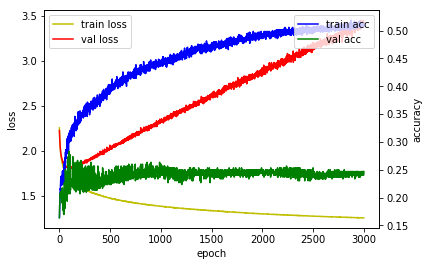

In [26]:
figs, loss_ax=plt.subplots()
acc_ax=loss_ax.twinx()
loss_ax.plot(hist.history['loss'],'y',label='train loss')
loss_ax.plot(hist.history['val_loss'],'r',label='val loss')

acc_ax.plot(hist.history['accuracy'],'b',label='train acc')
acc_ax.plot(hist.history['val_accuracy'],'g',label='val acc')

acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='upper right')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
plt.show()

In [27]:
res=model.evaluate(xTest, yTest, batch_size=32)
print("cost:"+str(res[0]))
print("accuracy:"+str(res[1]))

10000/10000 [==============================] - 0s 14us/step
cost:3.706244239425659
accuracy:0.2597000002861023


In [32]:
# 조기 종료 : earlystopping
# 콜백(함수) : 어떤 상황이 되었을때(val loss가 떨어지다가 올라가는 시점)
#함수 내에서 또 다른 어떤 함수를 호출하는 것

In [33]:
from keras.callbacks import EarlyStopping

In [34]:
es=EarlyStopping()

In [35]:
hist=model.fit(xTrain,yTrain,epochs=3000,batch_size=10, validation_data=(xVal,yVal),callbacks=[es])
#에폭 높게 줌 -> 오버피팅

Train on 700 samples, validate on 300 samples
Epoch 1/3000
700/700 [==============================] - 0s 120us/step - loss: 1.2591 - accuracy: 0.5129 - val_loss: 3.3829 - val_accuracy: 0.2433
Epoch 2/3000
700/700 [==============================] - 0s 109us/step - loss: 1.2582 - accuracy: 0.5114 - val_loss: 3.4305 - val_accuracy: 0.2400


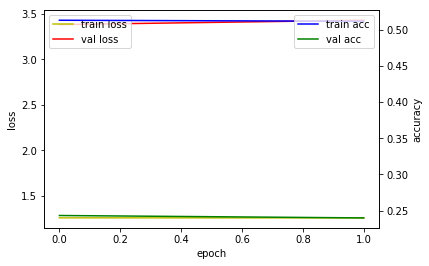

In [36]:
figs, loss_ax=plt.subplots()
acc_ax=loss_ax.twinx()
loss_ax.plot(hist.history['loss'],'y',label='train loss')
loss_ax.plot(hist.history['val_loss'],'r',label='val loss')

acc_ax.plot(hist.history['accuracy'],'b',label='train acc')
acc_ax.plot(hist.history['val_accuracy'],'g',label='val acc')

acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='upper right')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
plt.show()

In [42]:
es=EarlyStopping(patience=30)

In [43]:
hist=model.fit(xTrain,yTrain,epochs=3000,batch_size=10, validation_data=(xVal,yVal),callbacks=[es])
#에폭 높게 줌 -> 오버피팅

Train on 700 samples, validate on 300 samples
Epoch 1/3000
700/700 [==============================] - 0s 196us/step - loss: 2.2867 - accuracy: 0.1486 - val_loss: 2.2581 - val_accuracy: 0.1867
Epoch 2/3000
700/700 [==============================] - 0s 124us/step - loss: 2.2437 - accuracy: 0.1643 - val_loss: 2.2031 - val_accuracy: 0.2100
Epoch 3/3000
700/700 [==============================] - 0s 115us/step - loss: 2.1941 - accuracy: 0.2157 - val_loss: 2.1537 - val_accuracy: 0.2500
Epoch 4/3000
700/700 [==============================] - 0s 111us/step - loss: 2.1447 - accuracy: 0.2500 - val_loss: 2.1004 - val_accuracy: 0.3233
Epoch 5/3000
700/700 [==============================] - 0s 119us/step - loss: 2.0934 - accuracy: 0.2886 - val_loss: 2.0443 - val_accuracy: 0.3133
Epoch 6/3000
700/700 [==============================] - 0s 111us/step - loss: 2.0437 - accuracy: 0.3029 - val_loss: 1.9933 - val_accuracy: 0.3133
Epoch 7/3000
700/700 [==============================] - 0s 113us/step - loss: 

700/700 [==============================] - 0s 87us/step - loss: 1.2957 - accuracy: 0.5143 - val_loss: 1.4443 - val_accuracy: 0.4433
Epoch 57/3000
700/700 [==============================] - 0s 107us/step - loss: 1.2901 - accuracy: 0.5243 - val_loss: 1.4380 - val_accuracy: 0.4533
Epoch 58/3000
700/700 [==============================] - 0s 81us/step - loss: 1.2866 - accuracy: 0.5286 - val_loss: 1.4369 - val_accuracy: 0.4600
Epoch 59/3000
700/700 [==============================] - 0s 114us/step - loss: 1.2770 - accuracy: 0.5286 - val_loss: 1.4469 - val_accuracy: 0.4233
Epoch 60/3000
700/700 [==============================] - 0s 110us/step - loss: 1.2749 - accuracy: 0.5243 - val_loss: 1.4381 - val_accuracy: 0.4600
Epoch 61/3000
700/700 [==============================] - 0s 103us/step - loss: 1.2708 - accuracy: 0.5343 - val_loss: 1.4349 - val_accuracy: 0.4600
Epoch 62/3000
700/700 [==============================] - 0s 94us/step - loss: 1.2648 - accuracy: 0.5429 - val_loss: 1.4326 - val_accur

Epoch 112/3000
700/700 [==============================] - 0s 97us/step - loss: 1.1082 - accuracy: 0.5714 - val_loss: 1.4464 - val_accuracy: 0.4467
Epoch 113/3000
700/700 [==============================] - 0s 104us/step - loss: 1.1055 - accuracy: 0.5829 - val_loss: 1.4473 - val_accuracy: 0.4467
Epoch 114/3000
700/700 [==============================] - 0s 116us/step - loss: 1.1025 - accuracy: 0.5871 - val_loss: 1.4513 - val_accuracy: 0.4467


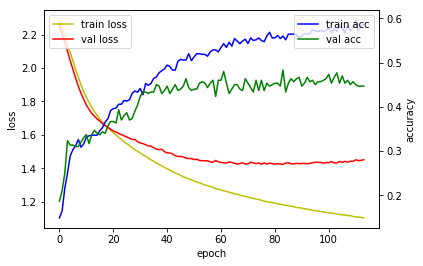

In [44]:
figs, loss_ax=plt.subplots()
acc_ax=loss_ax.twinx()
loss_ax.plot(hist.history['loss'],'y',label='train loss')
loss_ax.plot(hist.history['val_loss'],'r',label='val loss')

acc_ax.plot(hist.history['accuracy'],'b',label='train acc')
acc_ax.plot(hist.history['val_accuracy'],'g',label='val acc')

acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='upper right')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
plt.show()

In [45]:
import tensorflow as tf

In [46]:
seed=123
np.random.seed(seed)
tf.set_random_seed(seed)

In [52]:
# 어제 폐암 말기 환자 사망 여부 케라스 활용 예측
dataset=np.loadtxt("C:/Users/student/Downloads/Python_JP/dataset (1)/ThoraricSurgery.csv",delimiter=",")

In [53]:
x=dataset[:,0:17]
y=dataset[:,17]#1:수술 후 생존, 0:사망

In [54]:
model=Sequential()
model.add(Dense(30, input_dim=17,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [55]:
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])

In [56]:
model.fit(x,y,epochs=30, batch_size=10)

Epoch 1/30
470/470 [==============================] - 0s 565us/step - loss: 0.6485 - accuracy: 0.3234
Epoch 2/30
470/470 [==============================] - 0s 89us/step - loss: 0.1497 - accuracy: 0.8489
Epoch 3/30
470/470 [==============================] - 0s 83us/step - loss: 0.1486 - accuracy: 0.8511
Epoch 4/30
470/470 [==============================] - 0s 87us/step - loss: 0.1481 - accuracy: 0.8511
Epoch 5/30
470/470 [==============================] - 0s 85us/step - loss: 0.1488 - accuracy: 0.8511
Epoch 6/30
470/470 [==============================] - 0s 83us/step - loss: 0.1485 - accuracy: 0.8511
Epoch 7/30
470/470 [==============================] - 0s 81us/step - loss: 0.1488 - accuracy: 0.8511
Epoch 8/30
470/470 [==============================] - 0s 87us/step - loss: 0.1486 - accuracy: 0.8511
Epoch 9/30
470/470 [==============================] - 0s 81us/step - loss: 0.1478 - accuracy: 0.8532
Epoch 10/30
470/470 [==============================] - 0s 81us/step - loss: 0.1474 - accur

In [57]:
print(model.evaluate(x,y))

470/470 [==============================] - 0s 160us/step
[0.14518341751808816, 0.8510638475418091]


In [62]:
#당뇨 데이터 예측 텐서플로 활용
xy=np.loadtxt('C:/Users/student/Downloads/Python_JP/실습데이터/data-03-diabetes.csv',delimiter=",")

In [70]:
xdata=xy[:,0:-1]
xdata
ydata=xy[:,[-1]]
# ydata

In [71]:
print(xdata.shape, ydata.shape) #759,8   759,1

(759, 8) (759, 1)


In [72]:
w=tf.Variable(tf.random_normal([8,1]))
b=tf.Variable(tf.random_normal([1]))
x=tf.placeholder(tf.float32,shape=[None,8])
y=tf.placeholder(tf.float32,shape=[None,1])

In [74]:
hf=tf.sigmoid(tf.matmul(x,w)+b)
cost=-tf.reduce_mean(y*tf.log(hf)+(1-y)*tf.log(1-hf))

In [75]:
train=tf.train.GradientDescentOptimizer(0.01).minimize(cost)

In [77]:
predicted=tf.cast(hf>0.5,dtype=tf.float32)
accuracy=tf.reduce_mean(tf.cast(tf.equal(predicted,y),dtype=tf.float32))

In [80]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        cv,_=sess.run([cost,train],feed_dict={x:xdata,y:ydata})
        if step%200==0:
            print(step,cv)
    hv,pv,av=sess.run([hf,predicted,accuracy],feed_dict={x:xdata,y:ydata})
    print(hv,pv,av)

0 0.6588901
200 0.6212276
400 0.60513455
600 0.5942359
800 0.5850964
1000 0.5770026
1200 0.56974006
1400 0.56319195
1600 0.5572694
1800 0.55189735
2000 0.54701144
2200 0.54255575
2400 0.5384821
2600 0.53474844
2800 0.5313181
3000 0.52815926
3200 0.525244
3400 0.5225475
3600 0.5200487
3800 0.5177282
4000 0.5155693
4200 0.5135574
4400 0.51167905
4600 0.5099226
4800 0.5082777
5000 0.5067349
5200 0.50528574
5400 0.5039228
5600 0.5026393
5800 0.50142914
6000 0.50028676
6200 0.4992071
6400 0.49818572
6600 0.4972184
6800 0.49630135
7000 0.49543124
7200 0.49460486
7400 0.4938193
7600 0.49307194
7800 0.49236035
8000 0.4916823
8200 0.49103567
8400 0.49041852
8600 0.48982927
8800 0.48926613
9000 0.48872763
9200 0.4882123
9400 0.48771888
9600 0.48724622
9800 0.48679313
10000 0.4863585
[[0.4260255 ]
 [0.92599666]
 [0.1564888 ]
 [0.9510748 ]
 [0.27395073]
 [0.72131926]
 [0.9460343 ]
 [0.5896516 ]
 [0.21512163]
 [0.5487529 ]
 [0.71949965]
 [0.16023248]
 [0.2871047 ]
 [0.25939953]
 [0.7503699 ]
 [0.52

In [152]:
#주식 close 예측 케라스
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import pandas as pd

In [169]:
data=pd.read_csv("C:/Users/student/Downloads/Python_JP/실습데이터/GOOG.csv",delimiter=",")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-04-03,829.219971,840.849976,829.219971,838.549988,838.549988,1671500
1,2017-04-04,831.359985,835.179993,829.036011,834.570007,834.570007,1045400
2,2017-04-05,835.510010,842.450012,830.719971,831.409973,831.409973,1555300
3,2017-04-06,832.400024,836.390015,826.460022,827.880005,827.880005,1254400
4,2017-04-07,827.960022,828.484985,820.513000,824.669983,824.669983,1057300
...,...,...,...,...,...,...,...
749,2020-03-25,1126.469971,1148.900024,1086.010010,1102.489990,1102.489990,4081500
750,2020-03-26,1111.800049,1169.969971,1093.530029,1161.750000,1161.750000,3571700
751,2020-03-27,1125.670044,1150.670044,1105.910034,1110.709961,1110.709961,3208500
752,2020-03-30,1125.040039,1151.630005,1096.479980,1146.819946,1146.819946,2574100


In [170]:
data=data.set_index('Date')
data.index.names=[None]
data

,Open,High,Low,Close,Adj Close,Volume
2017-04-03,829.219971,840.849976,829.219971,838.549988,838.549988,1671500
2017-04-04,831.359985,835.179993,829.036011,834.570007,834.570007,1045400
2017-04-05,835.510010,842.450012,830.719971,831.409973,831.409973,1555300
2017-04-06,832.400024,836.390015,826.460022,827.880005,827.880005,1254400
2017-04-07,827.960022,828.484985,820.513000,824.669983,824.669983,1057300
...,...,...,...,...,...,...
2020-03-25,1126.469971,1148.900024,1086.010010,1102.489990,1102.489990,4081500
2020-03-26,1111.800049,1169.969971,1093.530029,1161.750000,1161.750000,3571700
2020-03-27,1125.670044,1150.670044,1105.910034,1110.709961,1110.709961,3208500
2020-03-30,1125.040039,1151.630005,1096.479980,1146.819946,1146.819946,2574100


In [171]:
del data['Adj Close']

In [216]:
xdata=data[data.columns.difference(['Close'])].values
xp=xdata[730:]
xdata=xdata[:730]
#values 붙여서 array형식으로
ydata=data.iloc[:,3].values
label=ydata[730:]
label=label.reshape(24,1)
ydata=ydata[:730]
ydata=ydata.reshape(730,1)
scaler=StandardScaler()
xdata=scaler.fit_transform(xdata)
xp=scaler.fit_transform(xp)
es=EarlyStopping()

In [215]:
label.shape

(24,)

In [189]:
x_train,x_test,y_train,y_test=train_test_split(xdata,ydata,test_size=0.3,random_state=42)

In [190]:
model=Sequential()
model.add(Dense(30,input_dim=4,activation='relu'))
model.add(Dense(1))
model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])

In [191]:
hist=model.fit(x_train,y_train,epochs=1000, batch_size=10, validation_data=(x_test,y_test),callbacks=[es])

Train on 527 samples, validate on 227 samples
Epoch 1/1000
527/527 [==============================] - 0s 516us/step - loss: 1276926.0757 - accuracy: 0.0000e+00 - val_loss: 1252710.7594 - val_accuracy: 0.0000e+00
Epoch 2/1000
527/527 [==============================] - 0s 140us/step - loss: 1275141.3999 - accuracy: 0.0000e+00 - val_loss: 1250582.4917 - val_accuracy: 0.0000e+00
Epoch 3/1000
527/527 [==============================] - 0s 142us/step - loss: 1272769.5332 - accuracy: 0.0000e+00 - val_loss: 1247676.0374 - val_accuracy: 0.0000e+00
Epoch 4/1000
527/527 [==============================] - 0s 139us/step - loss: 1269541.9241 - accuracy: 0.0000e+00 - val_loss: 1243822.3398 - val_accuracy: 0.0000e+00
Epoch 5/1000
527/527 [==============================] - 0s 144us/step - loss: 1265315.9360 - accuracy: 0.0000e+00 - val_loss: 1238868.7819 - val_accuracy: 0.0000e+00
Epoch 6/1000
527/527 [==============================] - 0s 137us/step - loss: 1259987.9146 - accuracy: 0.0000e+00 - val_loss

527/527 [==============================] - 0s 127us/step - loss: 551976.7983 - accuracy: 0.0000e+00 - val_loss: 523215.5330 - val_accuracy: 0.0000e+00
Epoch 51/1000
527/527 [==============================] - 0s 127us/step - loss: 537110.3844 - accuracy: 0.0000e+00 - val_loss: 508951.4939 - val_accuracy: 0.0000e+00
Epoch 52/1000
527/527 [==============================] - 0s 140us/step - loss: 522486.6768 - accuracy: 0.0000e+00 - val_loss: 495264.9458 - val_accuracy: 0.0000e+00
Epoch 53/1000
527/527 [==============================] - 0s 125us/step - loss: 508306.6414 - accuracy: 0.0000e+00 - val_loss: 481648.7368 - val_accuracy: 0.0000e+00
Epoch 54/1000
527/527 [==============================] - 0s 123us/step - loss: 494365.2870 - accuracy: 0.0000e+00 - val_loss: 468709.8888 - val_accuracy: 0.0000e+00
Epoch 55/1000
527/527 [==============================] - 0s 125us/step - loss: 480821.2281 - accuracy: 0.0000e+00 - val_loss: 455826.2609 - val_accuracy: 0.0000e+00
Epoch 56/1000
527/527 [=

Epoch 100/1000
527/527 [==============================] - 0s 138us/step - loss: 116456.6748 - accuracy: 0.0000e+00 - val_loss: 113006.5516 - val_accuracy: 0.0000e+00
Epoch 101/1000
527/527 [==============================] - 0s 135us/step - loss: 112474.3251 - accuracy: 0.0000e+00 - val_loss: 109236.8000 - val_accuracy: 0.0000e+00
Epoch 102/1000
527/527 [==============================] - 0s 140us/step - loss: 108647.3802 - accuracy: 0.0000e+00 - val_loss: 105447.3583 - val_accuracy: 0.0000e+00
Epoch 103/1000
527/527 [==============================] - 0s 131us/step - loss: 104913.2246 - accuracy: 0.0000e+00 - val_loss: 101890.5319 - val_accuracy: 0.0000e+00
Epoch 104/1000
527/527 [==============================] - 0s 133us/step - loss: 101334.1374 - accuracy: 0.0000e+00 - val_loss: 98365.2036 - val_accuracy: 0.0000e+00
Epoch 105/1000
527/527 [==============================] - 0s 125us/step - loss: 97814.4421 - accuracy: 0.0000e+00 - val_loss: 94919.6895 - val_accuracy: 0.0000e+00
Epoch 1

Epoch 150/1000
527/527 [==============================] - 0s 135us/step - loss: 16885.2491 - accuracy: 0.0000e+00 - val_loss: 16424.6313 - val_accuracy: 0.0000e+00
Epoch 151/1000
527/527 [==============================] - 0s 127us/step - loss: 16301.7098 - accuracy: 0.0000e+00 - val_loss: 15888.3328 - val_accuracy: 0.0000e+00
Epoch 152/1000
527/527 [==============================] - 0s 133us/step - loss: 15752.1655 - accuracy: 0.0000e+00 - val_loss: 15365.5208 - val_accuracy: 0.0000e+00
Epoch 153/1000
527/527 [==============================] - 0s 127us/step - loss: 15208.5147 - accuracy: 0.0000e+00 - val_loss: 14847.7612 - val_accuracy: 0.0000e+00
Epoch 154/1000
527/527 [==============================] - 0s 125us/step - loss: 14704.5044 - accuracy: 0.0000e+00 - val_loss: 14352.7615 - val_accuracy: 0.0000e+00
Epoch 155/1000
527/527 [==============================] - 0s 125us/step - loss: 14199.3209 - accuracy: 0.0000e+00 - val_loss: 13919.5113 - val_accuracy: 0.0000e+00
Epoch 156/1000
5

527/527 [==============================] - 0s 120us/step - loss: 3135.6417 - accuracy: 0.0000e+00 - val_loss: 3772.1565 - val_accuracy: 0.0000e+00
Epoch 201/1000
527/527 [==============================] - 0s 127us/step - loss: 3019.6696 - accuracy: 0.0000e+00 - val_loss: 3660.4356 - val_accuracy: 0.0044
Epoch 202/1000
527/527 [==============================] - 0s 120us/step - loss: 2916.8273 - accuracy: 0.0000e+00 - val_loss: 3601.1311 - val_accuracy: 0.0044
Epoch 203/1000
527/527 [==============================] - 0s 127us/step - loss: 2811.8524 - accuracy: 0.0000e+00 - val_loss: 3473.3345 - val_accuracy: 0.0044
Epoch 204/1000
527/527 [==============================] - 0s 125us/step - loss: 2725.3067 - accuracy: 0.0000e+00 - val_loss: 3372.4891 - val_accuracy: 0.0044
Epoch 205/1000
527/527 [==============================] - 0s 127us/step - loss: 2624.3757 - accuracy: 0.0000e+00 - val_loss: 3285.6003 - val_accuracy: 0.0044
Epoch 206/1000
527/527 [==============================] - 0s 13

527/527 [==============================] - 0s 137us/step - loss: 472.2381 - accuracy: 0.0019 - val_loss: 859.4104 - val_accuracy: 0.0000e+00
Epoch 252/1000
527/527 [==============================] - 0s 125us/step - loss: 454.8447 - accuracy: 0.0019 - val_loss: 836.1889 - val_accuracy: 0.0000e+00
Epoch 253/1000
527/527 [==============================] - 0s 146us/step - loss: 437.8878 - accuracy: 0.0019 - val_loss: 801.6618 - val_accuracy: 0.0000e+00
Epoch 254/1000
527/527 [==============================] - 0s 139us/step - loss: 423.6093 - accuracy: 0.0000e+00 - val_loss: 773.7748 - val_accuracy: 0.0000e+00
Epoch 255/1000
527/527 [==============================] - 0s 125us/step - loss: 406.2964 - accuracy: 0.0019 - val_loss: 759.0377 - val_accuracy: 0.0000e+00
Epoch 256/1000
527/527 [==============================] - 0s 123us/step - loss: 394.7255 - accuracy: 0.0019 - val_loss: 730.7072 - val_accuracy: 0.0000e+00
Epoch 257/1000
527/527 [==============================] - 0s 139us/step - l

Epoch 303/1000
527/527 [==============================] - 0s 133us/step - loss: 121.5806 - accuracy: 0.0000e+00 - val_loss: 210.5756 - val_accuracy: 0.0000e+00


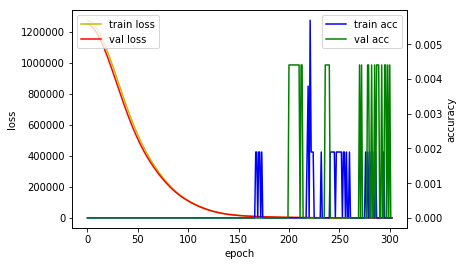

In [193]:
figs, loss_ax=plt.subplots()
acc_ax=loss_ax.twinx()
loss_ax.plot(hist.history['loss'],'y',label='train loss')
loss_ax.plot(hist.history['val_loss'],'r',label='val loss')

acc_ax.plot(hist.history['accuracy'],'b',label='train acc')
acc_ax.plot(hist.history['val_accuracy'],'g',label='val acc')

acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='upper right')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
plt.show()

In [226]:
yhat=model.predict(xp)

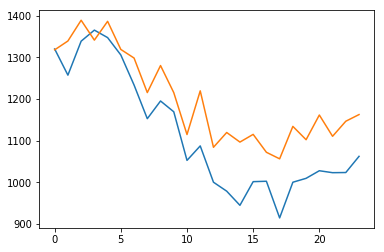

In [227]:
plt.plot(yhat)
plt.plot(label)
plt.show()

In [230]:
yhat

array([[1320.1549 ],
       [1257.4115 ],
       [1338.8611 ],
       [1365.4257 ],
       [1347.463  ],
       [1305.7493 ],
       [1233.6555 ],
       [1152.9353 ],
       [1195.3937 ],
       [1169.4849 ],
       [1052.8802 ],
       [1087.621  ],
       [1000.52344],
       [ 979.0193 ],
       [ 945.08344],
       [1001.8591 ],
       [1002.8226 ],
       [ 914.8589 ],
       [1000.4891 ],
       [1009.8391 ],
       [1028.0492 ],
       [1023.38116],
       [1023.7537 ],
       [1062.5815 ]], dtype=float32)

In [228]:
label.shape

(24, 1)

In [229]:
xp.shape

(24, 4)